In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
label_encoder = LabelEncoder()
scaler = StandardScaler()
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV


In [4]:
df = pd.read_csv("/content/drive/My Drive/XAI/XAI_Fairness/finaldata.csv")
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df.head()

age   sex  decile_score  priors_count              race  days_in_jail  \
0   69  Male             1             0             Other           0.0   
1   34  Male             3             0  African-American          10.0   
2   24  Male             4             4  African-American           1.0   
3   23  Male             8             1  African-American           0.0   
4   43  Male             1             2             Other           0.0   

   c_days_from_compas  is_violent_recid  is_recid  
0                 1.0                 0         0  
1                 1.0                 1         1  
2                 1.0                 0         1  
3                 1.0                 0         0  
4                76.0                 0         0

In [6]:
# Calculate class distribution
class_distribution = df['is_recid'].value_counts(normalize=True) * 100
print("Class Distribution (%):\n", class_distribution)


Class Distribution (%):
 is_recid
0    51.885223
1    48.114777
Name: proportion, dtype: float64


In [ ]:
filtered_df=df

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
df["sex"].replace({'Male': 1, 'Female': 0}, inplace=True)
df = pd.get_dummies(df, columns=['sex'])
label_encoder = LabelEncoder()
df = df.rename(columns={'sex_1': 'male', 'sex_0': 'Female'})
label_encoder = LabelEncoder()
df['male'] = label_encoder.fit_transform(df['male'])
df['Female'] = label_encoder.fit_transform(df['Female'])

df['race'] = label_encoder.fit_transform(df['race'])


In [12]:
X = df.drop(columns=['is_recid'])
Y = df['is_recid']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [14]:
df.head(3)

age  decile_score  priors_count  race  days_in_jail  c_days_from_compas  \
0   69             1             0     5           0.0                 1.0   
1   34             3             0     0          10.0                 1.0   
2   24             4             4     0           1.0                 1.0   

   is_violent_recid  is_recid  Female  male  
0                 0         0       0     1  
1                 1         1       0     1  
2                 0         1       0     1

#### I scaled numeric features but in the bagging method we don't need scaled data so in this part we don't use it

# Show Functions

In [9]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import plotly.express as px
import plotly.graph_objects as go
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score ,auc


In [10]:


from sklearn.metrics import roc_curve, auc

def calculateAUC(model):
    y_proba = model.predict_proba(X_test)  # Get predicted probabilities
    fpr, tpr, thresholds = roc_curve(Y_test, y_proba[:, 1])  # Calculate FPR and TPR
    roc_auc = auc(fpr, tpr)  # Calculate AUC
    print(f"AUC: {roc_auc:.4f}")  # Print the AUC value
    return roc_auc  # Return the AUC value


# BaggingEnsemble

In [15]:

base_model = DecisionTreeClassifier(random_state=0)
bagging_model = BaggingClassifier(
    estimator=base_model,
    random_state=42
)

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'estimator__max_depth': [2,4,5],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(bagging_model, param_distributions=param_grid, n_iter=10, cv=5, random_state=42, n_jobs=-1, verbose=1)
random_search.fit(X_train, Y_train)
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'n_estimators': 100, 'max_samples': 1.0, 'estimator__min_samples_split': 10, 'estimator__min_samples_leaf': 2, 'estimator__max_depth': 5}
Best score: 0.7312381552589525


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

base_model = DecisionTreeClassifier(
    random_state=0,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=2
)

bagging_model = BaggingClassifier(
    estimator=base_model,
    n_estimators=100,
    max_samples=0.8,
    random_state=50
)

bagging_model.fit(X_train, Y_train)

Y_pred = bagging_model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))


Accuracy: 0.7366597366597366
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.77       789
           1       0.73      0.67      0.70       654

    accuracy                           0.74      1443
   macro avg       0.74      0.73      0.73      1443
weighted avg       0.74      0.74      0.74      1443



Number of nodes in first tree: 31
Depth of first tree: 5


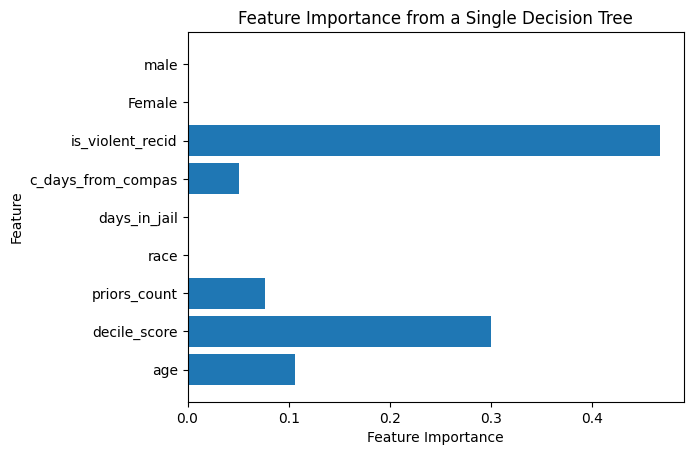

In [19]:
tree = bagging_model.estimators_[0]
print(f"Number of nodes in first tree: {tree.tree_.node_count}")
print(f"Depth of first tree: {tree.tree_.max_depth}")

# Plot feature importance from a single tree
feature_importance = tree.feature_importances_
plt.barh(X_train.columns,feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from a Single Decision Tree")
plt.show()

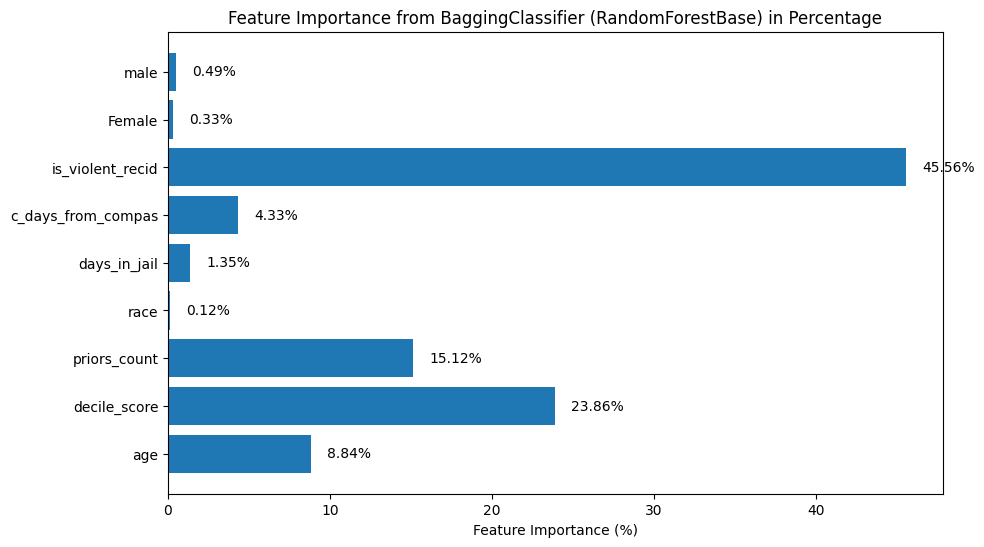

age: 8.84%
decile_score: 23.86%
priors_count: 15.12%
race: 0.12%
days_in_jail: 1.35%
c_days_from_compas: 4.33%
is_violent_recid: 45.56%
Female: 0.33%
male: 0.49%


In [20]:
import numpy as np
import matplotlib.pyplot as plt

base_models = bagging_model.estimators_

importances = np.zeros(X_train.shape[1])

# Iterate through each base model and accumulate the feature importances
for model in base_models:
    importances += model.feature_importances_

# Average the feature importances across all models
importances /= len(base_models)

importances_percent = 100 * importances / importances.sum()

feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

plt.figure(figsize=(10, 6))
bars = plt.barh(feature_names, importances_percent)
plt.xlabel("Feature Importance (%)")
plt.title("Feature Importance from BaggingClassifier (RandomForestBase) in Percentage")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', va='center')

plt.show()

for feature, importance in zip(feature_names, importances_percent):
    print(f"{feature}: {importance:.2f}%")


In [21]:
train_score111 = accuracy_score(Y_train, bagging_model.predict(X_train)) * 100

test_score111 = accuracy_score(Y_test, bagging_model.predict(X_test)) * 100
print(f'Test accuracy:{test_score111}\nTrain accuracy:{train_score111}' )

Test accuracy:73.66597366597367
Train accuracy:74.33720325766765


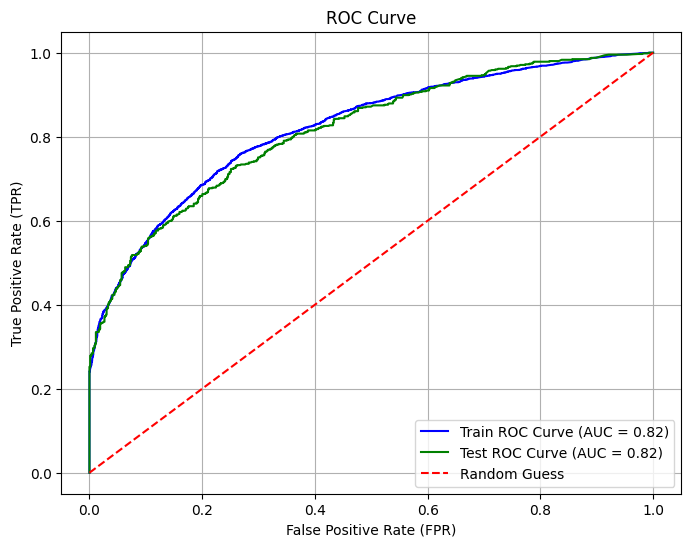

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Use predict_proba to get probabilities for the positive class
y_pred_train_prob = bagging_model.predict_proba(X_train)[:, 1]
y_pred_test_prob = bagging_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for train and test
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, y_pred_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, y_pred_test_prob)

auc_train = roc_auc_score(Y_train, y_pred_train_prob)
auc_test = roc_auc_score(Y_test, y_pred_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f"Train ROC Curve (AUC = {auc_train:.2f})")
plt.plot(fpr_test, tpr_test, color='green', label=f"Test ROC Curve (AUC = {auc_test:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()



In [23]:

calculateAUC(bagging_model)


AUC: 0.8150


0.8150215307573943

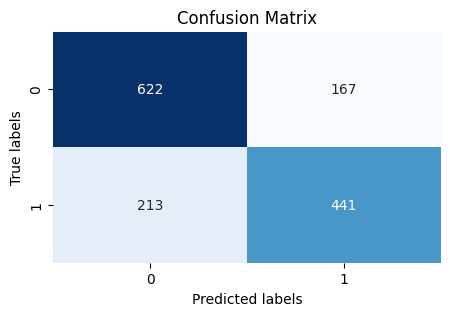

In [24]:
conf_matrix1 = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()



---



---
# 1.Shap


In [25]:
import shap

shap.initjs()

In [ ]:
!pip list


In [26]:
import shap

explainer= shap.TreeExplainer(bagging_model.estimators_[0])  # Use only one of the estimators (RandomForestClassifier) for the explainer
shap_values = explainer(X_test)




# Attention

# ** Use first instance from X_test for both shap and lime to compare

In [27]:
X_test[:1]


age  decile_score  priors_count  race  days_in_jail  c_days_from_compas  \
308   62             1             0     2           1.0                 0.0   

     is_violent_recid  Female  male  
308                 0       0     1

In [28]:
Y_test[:1]


308    0
Name: is_recid, dtype: int64

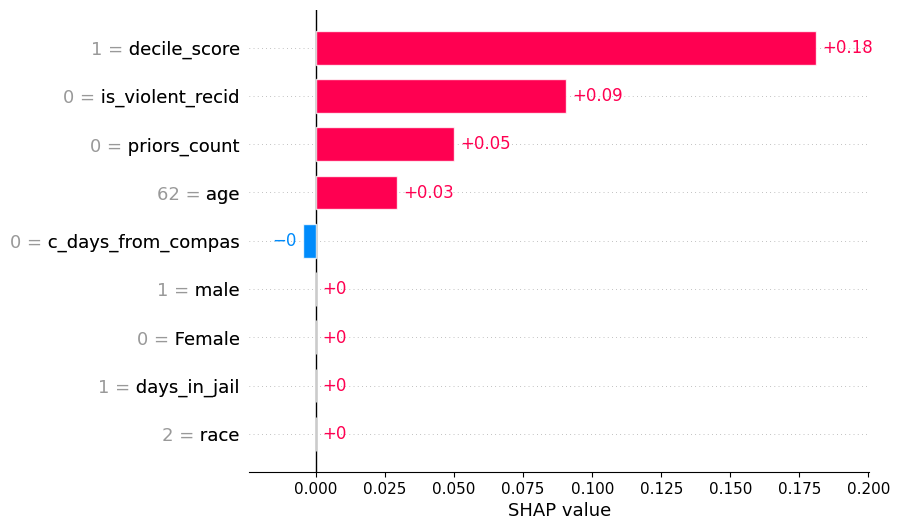

In [29]:

# Now plot the waterfall chart for the first instance
shap.plots.bar(shap_values[0, :, 0])  # First instance, first class




---
### The table for shape value for class 0


In [30]:
import shap
import pandas as pd
#Shap value
shap_values_class_0 = shap_values.values[:, :, 0]  # For the first class

# Convert SHAP values for class 0 to a pandas DataFrame
shap_table = pd.DataFrame(
    shap_values_class_0,
    columns=X_test.columns,  # Use feature names from X_test
    index=X_test.index       # Use the index from X_test
)

# Add base values (optional)
shap_table['Base Value'] = shap_values.base_values[:, 0]  # Base value for class 0
shap_table['SHAP Prediction'] = shap_table.sum(axis=1) + shap_table['Base Value']


In [31]:
shap_table.head()

age  decile_score  priors_count  race  days_in_jail  \
308   0.029387      0.180901      0.050057   0.0           0.0   
381   0.017821      0.025695      0.103347   0.0           0.0   
3238  0.068183      0.067888     -0.090548   0.0           0.0   
2312 -0.239402     -0.094440      0.048196   0.0           0.0   
251   0.029387      0.180901      0.050057   0.0           0.0   

      c_days_from_compas  is_violent_recid  Female  male  Base Value  \
308            -0.004617          0.090551     0.0   0.0    0.502166   
381            -0.003308          0.079580     0.0   0.0    0.502166   
3238           -0.007175          0.071958     0.0   0.0    0.502166   
2312           -0.014571          0.050386     0.0   0.0    0.502166   
251            -0.004617          0.090551     0.0   0.0    0.502166   

      SHAP Prediction  
308          1.350612  
381          1.227468  
3238         1.114639  
2312         0.754503  
251          1.350612



---
### The table for shape value for class 1



In [32]:
import shap
import pandas as pd
#Shap value
shap_values_class_1 = shap_values.values[:, :, 1]  # For the first class

# Convert SHAP values for class 0 to a pandas DataFrame
shap_table1 = pd.DataFrame(
    shap_values_class_1,
    columns=X_test.columns,  # Use feature names from X_test
    index=X_test.index       # Use the index from X_test
)

# Add base values (optional)
shap_table1['Base Value'] = shap_values.base_values[:, 0]  # Base value for class 0
shap_table1['SHAP Prediction'] = shap_table1.sum(axis=1) + shap_table1['Base Value']



In [33]:
shap_table1.head()

age  decile_score  priors_count  race  days_in_jail  \
308  -0.029387     -0.180901     -0.050057   0.0           0.0   
381  -0.017821     -0.025695     -0.103347   0.0           0.0   
3238 -0.068183     -0.067888      0.090548   0.0           0.0   
2312  0.239402      0.094440     -0.048196   0.0           0.0   
251  -0.029387     -0.180901     -0.050057   0.0           0.0   

      c_days_from_compas  is_violent_recid  Female  male  Base Value  \
308             0.004617         -0.090551     0.0   0.0    0.502166   
381             0.003308         -0.079580     0.0   0.0    0.502166   
3238            0.007175         -0.071958     0.0   0.0    0.502166   
2312            0.014571         -0.050386     0.0   0.0    0.502166   
251             0.004617         -0.090551     0.0   0.0    0.502166   

      SHAP Prediction  
308          0.658054  
381          0.781198  
3238         0.894027  
2312         1.254163  
251          0.658054

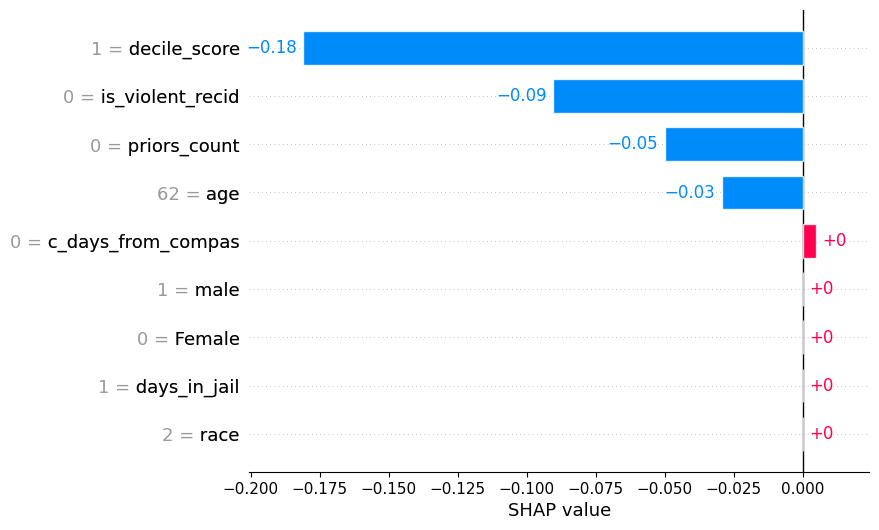

In [34]:
shap.plots.bar(shap_values[0, :, 1])  # First instance, second class


### Lime

In [ ]:
! pip install lime

In [36]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np


In [37]:
# Initialize LIME Explainer with numeric class names (0 and 1)
explainer = LimeTabularExplainer(
    training_data=X_train.values,   # Use training data
    feature_names=X_train.columns,  # Feature names
    class_names=[0, 1],             # Numeric class names
    mode='classification'           # Mode of the model
)


In [38]:
X_train.columns

Index(['age', 'decile_score', 'priors_count', 'race', 'days_in_jail',
       'c_days_from_compas', 'is_violent_recid', 'Female', 'male'],
      dtype='object')

In [39]:
# Select a sample to explain (e.g., the first instance in the test set)
sample_index = 0
sample = X_test.iloc[sample_index].values

# Explain the prediction for the selected instance
explanation = explainer.explain_instance(
    data_row=sample,                # The instance to explain
    predict_fn=bagging_model.predict_proba  # The prediction function of your model
)

# Display explanation
explanation.show_in_notebook(show_table=True)


In [40]:
lime_values = explanation.as_list()
lime_table = pd.DataFrame(lime_values, columns=['Feature', 'Contribution'])

# Display the table
print(lime_table)

                       Feature  Contribution
0     is_violent_recid <= 0.00     -0.582425
1         priors_count <= 0.00     -0.139954
2   c_days_from_compas <= 1.00      0.092332
3         decile_score <= 2.00     -0.089874
4                  age > 43.00     -0.057167
5  0.00 < days_in_jail <= 1.00     -0.014590
6               Female <= 0.00      0.011498
7          0.00 < race <= 2.00     -0.003299
8                 male <= 1.00      0.000000


In [41]:
# Select a sample to explain (e.g., the first instance in the test set)
sample_index = 1
sample = X_test.iloc[sample_index].values

# Explain the prediction for the selected instance
explanation = explainer.explain_instance(
    data_row=sample,                # The instance to explain
    predict_fn=bagging_model.predict_proba  # The prediction function of your model
)

# Display explanation
explanation.show_in_notebook(show_table=True)




---



---



---



### 3.Permutation Feature Importance




In [42]:
from sklearn.inspection import permutation_importance


In [43]:
import pandas as pd
from sklearn.inspection import permutation_importance

# Assuming xgb_model is the trained model and X_test, Y_test are your test data
result = permutation_importance(bagging_model, X_test, Y_test, n_repeats=10, random_state=42)

# Create a DataFrame to display the results with feature names
importance_df = pd.DataFrame({
    'Feature': X_test.columns,  # Feature names
    'Importance': result.importances_mean  # Mean permutation importance
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the table
print(importance_df)


              Feature  Importance
2        priors_count    0.087110
6    is_violent_recid    0.071656
0                 age    0.020859
1        decile_score    0.019958
5  c_days_from_compas    0.009217
4        days_in_jail    0.002148
3                race   -0.000139
7              Female   -0.001040
8                male   -0.002356




---



---



---

